In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns


## Part 1:
### A) & B) Show the distribution of phi and psi combinations using a scatter plot and a heatmap



## Part 1:
### A) & B) Show the distribution of phi and psi combinations using a scatter plot and a heatmap



In [4]:
data = pd.read_csv('./Resources/assignment3-data.csv')

In [5]:
data.head(3)
org_data = data.copy()

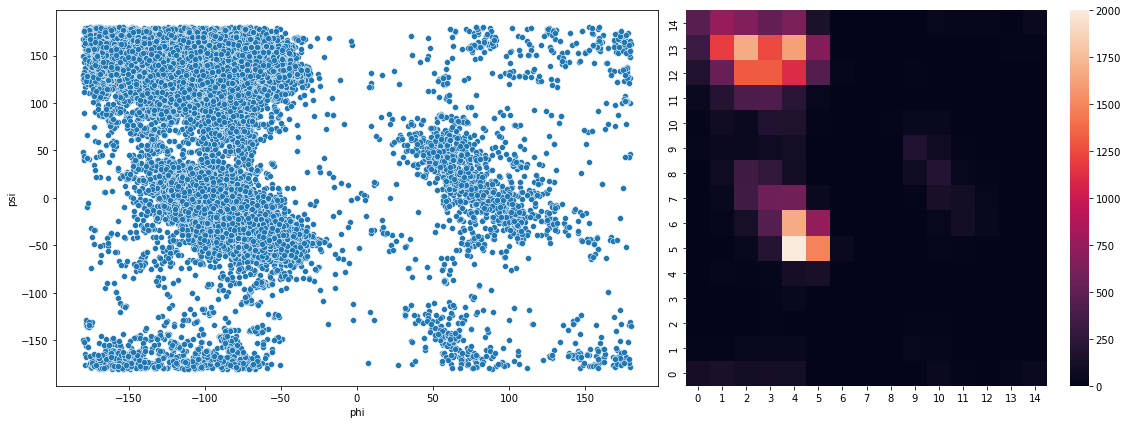

In [6]:
f, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
heatmap, xedges, yedges = np.histogram2d(data['psi'], data['phi'], bins=(15,15))
plot = sns.scatterplot(
    data=data, x="phi", y="psi", ax=axs[0]
)
plot2 = sns.heatmap(
    heatmap, ax=axs[1]
    
)
plot2.set_ylim(0,15)
plot2.set_xlim(0,15)

f.tight_layout()

#seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

### Part 2:
Use  the  K-means  clustering  method to  cluster  the  phi  and psi  angle  combinations  in  the data file

In [7]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [8]:
data = data[['phi','psi']]


In [9]:
kmeans = KMeans(3).fit(data)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-105.18210709  134.59750562]
 [ -78.08276981  -36.94442146]
 [  87.55008471    8.80213455]]
[0 0 1 ... 0 1 0]


Text(0.5, 1.0, 'Phi vs Psi, KMean(k=3)')

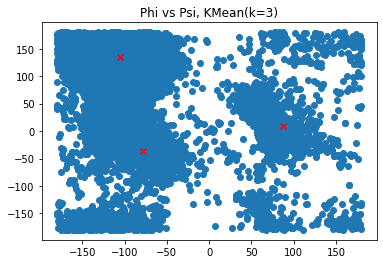

In [10]:

plt.scatter(data['phi'],data['psi'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='x')
plt.title('Phi vs Psi, KMean(k=3)')

### A)
Experiment with different values of K. Suggest an appropriate value of K for this 
task and motivate this choice

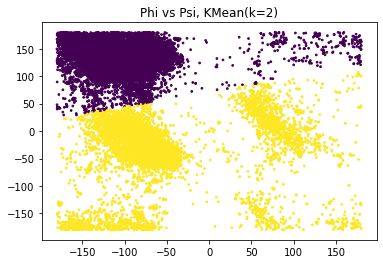

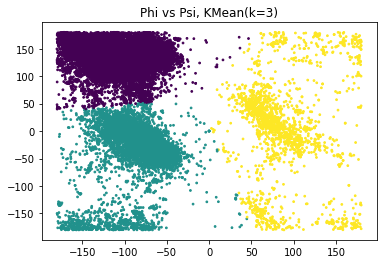

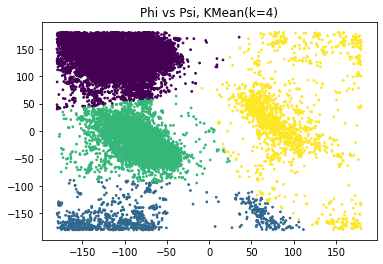

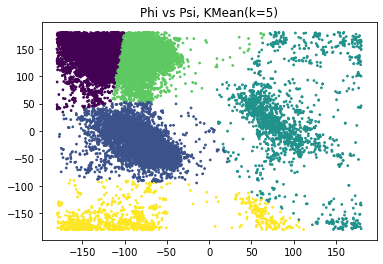

In [11]:
def showClusters(df,k):
    temp = df
    kmeans = KMeans(k, random_state=0).fit(temp)
    identified_clusters = kmeans.fit_predict(temp)
    cluster_data = temp.copy()
    cluster_data['Cluster'] = identified_clusters
    plt.scatter(cluster_data['phi'],cluster_data['psi'],c=cluster_data['Cluster'],s=3)
    plt.title('Phi vs Psi, KMean(k={k_val})'.format(k_val=k))
    return plt

showClusters(data,2).show()
showClusters(data,3).show()
showClusters(data,4).show()
showClusters(data,5).show()

<function matplotlib.pyplot.show(close=None, block=None)>

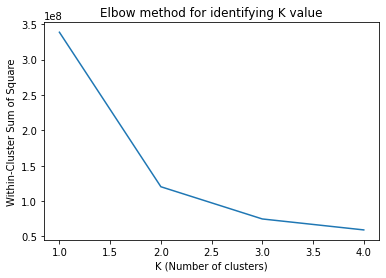

In [12]:
# Within-Cluster Sum of Square
wcss=[]

for i in range(1,5):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

number_clusters = range(1,5)
plt.plot(number_clusters,wcss)
plt.title('Elbow method for identifying K value')
plt.xlabel('K (Number of clusters)')
plt.ylabel('Within-Cluster Sum of Square')
plt.show

Elbow method shows K = 3 to be optimal as the increase in sum of square beings, any higher risks over-clustering.

### B) 
#### Validate the clusters that are found with the chosen value of K.  

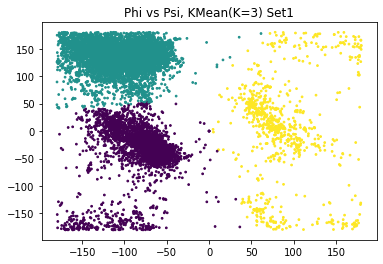

In [13]:
# By creating subsamples, we split the data into three separate sets and cluster with K = 3
set1 = data.sample(frac = 0.4)
set2 = data.drop(set1.index).sample(frac = 0.3)
set3 = data.drop(set1.index).drop(set2.index)
set1_plt = showClusters(set1,3).title('Phi vs Psi, KMean(K=3) Set1')



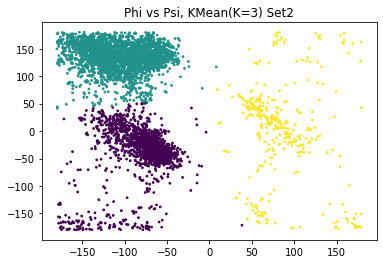

In [14]:
set2_plt = showClusters(set2,3).title('Phi vs Psi, KMean(K=3) Set2')


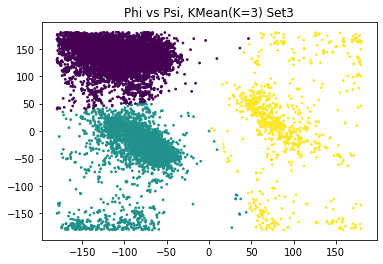

In [15]:
set3_plt = showClusters(set3,3).title('Phi vs Psi, KMean(K=3) Set3')



In [16]:
## cluster assumed stable

### C) 
Do the clusters found in part 2.a seem reasonable?

### D)
Can you change the data to get better results (or the same results in a simpler way)?

<module 'matplotlib.pyplot' from 'c:\\Users\\Johan Birgersson\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

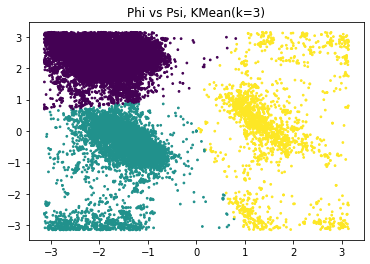

In [17]:
temp = data.copy()
data_rad = temp.apply(np.radians)


showClusters(data_rad,3)

<module 'matplotlib.pyplot' from 'c:\\Users\\Johan Birgersson\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

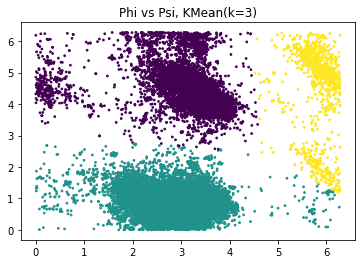

In [18]:

temp = data_rad.copy()

data_shift = (temp - np.pi/2) % (2*np.pi)

showClusters(data_shift,3)



## Part 3:
 Use the DBSCAN method to cluster the phi and psi angle combinations in the data file

In [60]:
from sklearn.cluster import DBSCAN

D_train = data_shift[['phi','psi']]
D_train = D_train.loc[:, ["phi", "psi"]].values.reshape(-1, 2)


def plot_dbscan_cluster(df, eps, min_samples,show):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    #  **core_sample_indices_ method in DBSCAN function says what?**
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    #print('Estimated number of clusters: %d' % n_clusters_)
    #print('Estimated number of noise points: %d' % n_noise_)
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):          
            class_member_mask = (labels == k)
            if i != -1: # noise
                xy = D_train[class_member_mask & core_samples_mask]
                plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
                nonCore = D_train[class_member_mask & ~core_samples_mask]
                plt.plot(nonCore[:, 0], nonCore[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3)

    print('Non-Core (outliers) in sample: ' + str(len(nonCore)))
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    if show == "show":
        plt.show()
    return (xy,nonCore)

Non-Core (outliers) in sample: 240


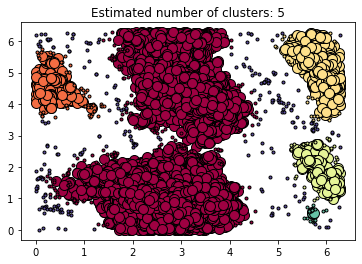

Non-Core (outliers) in sample: 240


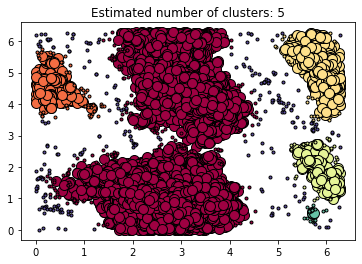

In [61]:
plot_dbscan_cluster(D_train, 0.3, 25,"show")
outliers = plot_dbscan_cluster(D_train, 0.3, 25," ")[1]



a. Motivate: i. the  choice  of the  minimum number  of  samples in the  neighbourhood  
for a point to be considered as a core point, and ii. the  choice  of  the  maximum distance between two  samples  belonging 
to the same neighbourhood (“eps” or “epsilon”)

tbd 
b. Highlight  the  clusters  found  using  DBSCAN  and  any  outliers  in  a  scatter  plot.  
How  many  outliers  are  found?  Plot  a  bar  chart  to  show  which  amino  acid  
residue types are most frequently outliers. 

In [70]:


org_data
df_names = org_data[['residue name','phi','psi']]
temp = df_names[['phi','psi']].apply(np.radians)

df_names[['phi','psi']] = (temp - np.pi/2) % (2*np.pi)

#print(df_names[:9])
#df_names = df_names.loc[:, ["residue name","phi","psi"]].values.reshape(-1,1,1)


print(df_names)

outliers = pd.DataFrame(outliers, columns=['phi','psi'])
print(outliers)

#perform merge if phi and psi are equal.
#plot
#plt.plot(outliers[:, 0], outliers[:, 1], 'o', markeredgecolor='k', markersize=3)


      residue name       phi       psi
0              LYS  2.106388  0.919050
1              PRO  3.939501  0.802888
2              LYS  2.618472  1.767927
3              LEU  2.350658  0.822810
4              LEU  2.882386  0.103472
...            ...       ...       ...
29364          GLY  2.133673  1.138366
29365          GLN  2.662874  0.750832
29366          ILE  2.729931  0.385578
29367          ASN  2.955387  4.501155
29368          LYS  1.746180  0.073892

[29369 rows x 3 columns]
          phi       psi
0    1.671304  3.988873
1    1.996662  2.619680
2    0.199992  1.138205
3    4.455609  3.062852
4    4.665464  2.462668
..        ...       ...
235  0.018573  1.387194
236  5.333016  1.412549
237  0.007168  1.329471
238  5.545811  1.189400
239  6.247624  3.019912

[240 rows x 2 columns]


C:\Users\Johan Birgersson\AppData\Local\Temp\ipykernel_21252\975251479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_names[['phi','psi']] = (temp - np.pi/2) % (2*np.pi)


org_data

df_names = org_data[['residue name','phi','psi']]
temp = df_names[['phi','psi']].apply(np.radians)


df_names[['phi','psi']] = (temp - np.pi/2) % (2*np.pi)

df_names
#print(df_names[:9])
df_names = df_names.loc[:, ["residue name","phi","psi"]].values.reshape(-1,1,1)
df_names

def plot__res_name_dbscan_cluster(df, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(df.loc[:, "phi","psi"])
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    #  **core_sample_indices_ method in DBSCAN function says what?**
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    #print('Estimated number of clusters: %d' % n_clusters_)
    #print('Estimated number of noise points: %d' % n_noise_)
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):          
            class_member_mask = (labels == k)
            if i != -1: # noise
                xy = D_train[class_member_mask & core_samples_mask]
                plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
                nonCore = D_train[class_member_mask & ~core_samples_mask]
                plt.plot(nonCore[:, 0], nonCore[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3)

    print('Non-Core (outliers) in sample: ' + str(len(nonCore)))
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

plot__res_name_dbscan_cluster(df_names,0.3,25)


In [34]:
import numpy
a = numpy.matrix([[1, 2, 3, 4], [5, 6, 7, 8]])
print("Without reshaping  -> ")
print(a)
b = numpy.reshape(a, -1)
print("HERE We don't know about what number we should give to row/col")
print("Reshaping as (a,-1)")
print(b)
c = numpy.reshape(a, (-1,2))
print("HERE We just know about number of columns")
print("Reshaping as (a,(-1,2))")
print(c)
d = numpy.reshape(a, (2,-1))
print("HERE We just know about number of rows")
print("Reshaping as (a,(2,-1))")
print(d)

Without reshaping  -> 
[[1 2 3 4]
 [5 6 7 8]]
HERE We don't know about what number we should give to row/col
Reshaping as (a,-1)
[[1 2 3 4 5 6 7 8]]
HERE We just know about number of columns
Reshaping as (a,(-1,2))
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
HERE We just know about number of rows
Reshaping as (a,(2,-1))
[[1 2 3 4]
 [5 6 7 8]]
